In [1]:
!pip install mpld3

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch
import mpld3

In [3]:

# Function to draw a user terminal
def draw_user_terminal(ax, x, y, size=0.5):
    user_terminal = plt.Circle((x, y), size, color='green', label='User Terminal')
    ax.add_patch(user_terminal)

# Function to draw a satellite hub at a ground station
def draw_satellite_hub(ax, x, y, size=0.8):
    satellite_hub = plt.Circle((x, y), size, color='red', label='Satellite Hub')
    ax.add_patch(satellite_hub)

# Function to connect two points with a line
def draw_connection(ax, from_point, to_point, color='black'):
    x1, y1 = from_point
    x2, y2 = to_point
    line = ConnectionPatch((x1, y1), (x2, y2), 'data', 'data', arrowstyle='->', color='gray', linewidth=0.6)
    ax.add_patch(line)

def draw_satellite(ax, x, y, size=1):
    # Draw the main body of the satellite

    satellite_body = plt.Circle((x, y), 0.3, color='#345512', label='Satellite Body')

    # Draw tilted solar panels using rectangles
    panel_length = size * 3
    panel_height = size / 3
    panel_angle = 20  # Angle of tilt in degrees

    # Calculate the position of the rectangle
    rect_x = x - panel_length / 2
    rect_y = y - size

    # Draw the tilted solar panel
    panel = Rectangle((rect_x, rect_y+0.5), panel_length, panel_height, angle=panel_angle, edgecolor='gray', facecolor='gray')

    # Draw antenna using a line
    antenna_length = 0.3
    ax.plot([x, x+0.01], [y, y + antenna_length], color='#740095', linestyle='-', linewidth=6)

    # Add all components to the plot
    ax.add_patch(satellite_body)
    ax.add_patch(panel)



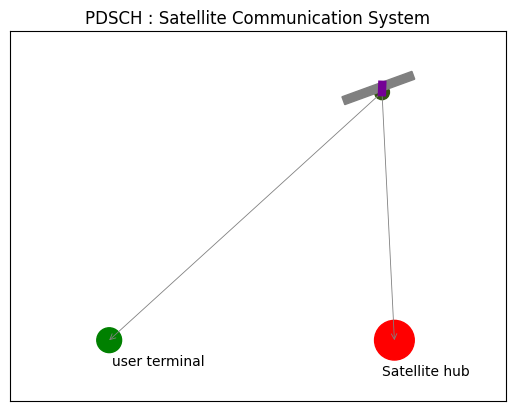

In [4]:

# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlim(-15, 5)
ax.set_ylim(-15, 5)

# Draw the modified satellite
draw_satellite(ax, 0, 0)

draw_user_terminal(ax, -11, -10)
draw_satellite_hub(ax, 0.5, -10)

# Draw connections
draw_connection(ax, (0, 0), (-11, -10))
draw_connection(ax, (0, 0), (0.5, -10))

ax.text(-10.9, -11,'user terminal ', fontsize=10)
ax.text(0, -11.4,'Satellite hub ', fontsize=10)

# Set labels
#ax.set_xlabel('X-axis')
#ax.set_ylabel('Y-axis')
ax.set_title('PDSCH : Satellite Communication System')
plt.xticks([])
plt.yticks([])

# Add legend
#ax.legend()

# Export the Matplotlib figure to an HTML file
mpld3.save_html(fig, 'satellite2.html')